<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Cinzel&family=Rokkitt:ital@1&display=swap" rel="stylesheet">

<h1 style="text-align:center;font-family: 'Cinzel', serif;">Practical Lab 5 - Cross-Validation for Model Selection</h1>
<h2 style="text-align:center;font-family: 'Cinzel', serif;">Waseem Raja Shaik</h2>
<h2 style="text-align:center;font-family: 'Cinzel', serif;">Student Id - 8894805</h2>

<h2 style="text-align:center;font-family: 'Rokkitt', serif;">Imported Libraries like</h2>
<img src="https://numpy.org/doc/stable/_static/numpylogo.svg" style="background-color:white;padding:10px;" width="500">

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" style="background-color:white;padding:10px;" width="500">
<img src="https://matplotlib.org/3.1.0/_images/sphx_glr_logos2_003.png" style="background-color:white;padding:10px;" width="500">



In [107]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_error, mean_squared_error ,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np

# kept scaled false for not scaled data
# as_frame true for using pandas dataframe
Xdata, ydata = load_diabetes(as_frame=True, scaled=False, return_X_y=True)

1. Utilize the diabetes dataset from lab 4. Perform cross-validation on nine polynomial models, ranging from degree 0 to 8. (2 points)

In [54]:
def polynomial_models(X,y, degree=0):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    r2_score = cross_val_score(model, X, y, cv=5)
    mae_score = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    r2_score_list = {f'r2_cv{i+1}': val for i, val in enumerate(r2_score)}
    mae_score_list = {f'mae_cv{i+1}': val for i, val in enumerate(mae_score)}
    results = {
        'degree': degree,
        'mean_r2': np.mean(r2_score),
        'sd_r2': np.std(r2_score),
        'mean_mae': np.mean(mae_score),
        'sd_mae': np.std(mae_score),
    }
    cv_values = {
        'degree': degree,
        **r2_score_list,
        **mae_score_list
    }
    return {'cv_values': cv_values, 'results': results}

- In above ```cross_val_score``` function if you provide ```cv=5``` then it will split the data into 5 equal-sized folds and performs training and evaluation process 5 times

- ```scoring='neg_mean_absolute_error'``` will give negative mean absolute error (MAE) as the scoring metric during cross validation, that's why we add ```-``` in ```cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')``` for getting positive MAE values which is actual MAE values

- we are not adding scoring for getting ```R2``` because if the model is linear regression then default scoring is ```R2```. As ```make_pipeline(PolynomialFeatures(degree), LinearRegression())``` has LinearRegression as end model then default scoring is ```R2```

In [91]:
degrees = np.arange(0, 9)
cross_validation_data = []
mean_standard_deviation = []
for degree in degrees:
    value = polynomial_models(Xdata,ydata, degree)
    cross_validation_data.append(value['cv_values'])
    mean_standard_deviation.append(value['results'])

2. Construct a table summarizing the cross-validation results. Each model should have a separate row in the table. Include the R-Squared and Mean Absolute Error (MAE) metrics for each model. Calculate the mean value and standard deviation of these metrics from the cross-validation. Include both values. (2 points)


In [93]:
df = pd.DataFrame(cross_validation_data)
df.columns = ['degree', 'R2 cv1','R2 cv2','R2 cv3','R2 cv4','R2 cv5', 'MAE cv1','MAE cv2','MAE cv3','MAE cv4','MAE cv5']
print(df)

   degree       R2 cv1        R2 cv2       R2 cv3       R2 cv4       R2 cv5   
0       0    -0.098448     -0.027867    -0.000533    -0.008342    -0.002340  \
1       1     0.429556      0.522599     0.482681     0.426498     0.550248   
2       2     0.348289     -1.324456     0.446754    -4.128244    -0.886589   
3       3   -16.287055    -26.928559   -54.419951  -592.670175  -326.791347   
4       4  -171.389189   -744.068238 -1088.421246  -729.536012  -122.000854   
5       5  -365.262846  -1176.428380  -184.919166  -138.071361  -319.602681   
6       6  -496.348363  -6950.676569  -362.389594  -222.246192  -439.449785   
7       7  -766.003225 -24562.841623 -1170.909595  -494.378655  -660.337277   
8       8 -1272.645700 -72123.056287 -4411.264522 -1512.352139 -1061.956938   

      MAE cv1      MAE cv2      MAE cv3      MAE cv4      MAE cv5  
0   60.952510    68.321705    67.135914    63.264381    70.553608  
1   43.026166    44.800480    48.155710    43.013032    42.387108  
2   4

In [97]:
df_msd = pd.DataFrame(mean_standard_deviation)
df_msd.columns = ['degree', 'Mean R2', 'STD R2', 'Mean MAE', 'STD MAE']
print(df_msd)

   degree       Mean R2        STD R2     Mean MAE     STD MAE
0       0     -0.027506      0.036772    66.045624    3.474660
1       1      0.482316      0.049269    44.276499    2.100110
2       2     -1.108849      1.658661    72.322249   22.655922
3       3   -203.419417    225.878361   342.052260  142.438464
4       4   -571.083108    369.891883   657.260477  159.475902
5       5   -436.856887    379.100423   562.993636   59.917202
6       6  -1694.222101   2629.834958   742.589052  190.836052
7       7  -5530.894075   9518.586954  1032.681725  393.439617
8       8 -16076.255117  28049.952579  1475.658532  706.280274


3. Identification of the Best Model: Identify the model that exhibits the highest performance based on the R-Squared and MAE metrics. Provide an explanation for choosing this specific model.


iloc is a method in pandas that is used for integer-based indexing of a DataFrame or Series. 

In [106]:
best_r2_index = np.argmax(df_msd.iloc[:, 1])
best_mae_index = np.argmin(df_msd.iloc[:, 3])

best_r2_degree, best_r2, std_r2 = df_msd.iloc[best_r2_index, :3]
best_mae_degree, best_mae, std_mae = df_msd.iloc[best_mae_index, 0], df_msd.iloc[best_mae_index, 3], df_msd.iloc[best_mae_index, 4]

print("Best Model based on R-Squared:")
print(f"Degree: {best_r2_degree}, R-Squared: {best_r2:.4f}, Std R-Squared: {std_r2:.4f}")

print("Best Model based on MAE:")
print(f"Degree: {best_mae_degree}, MAE: {best_mae:.4f}, Std MAE: {std_mae:.4f}")


Best Model based on R-Squared:
Degree: 1.0, R-Squared: 0.4823, Std R-Squared: 0.0493
Best Model based on MAE:
Degree: 1, MAE: 44.2765, Std MAE: 2.1001


- Optional (No Extra Grade):Additional analysis and interpretation of the models' performances are welcome. You may explore further insights beyond the required metrics. Feel free to include your findings.

The below graphs shows us the results of cross-validation on 5 equal size folds(can be said 5 subsets) of diabetes dataset for both R-Squared and Mean Absolute Error.

- As you can see from both graphs all 5 folds has different values, it indicates that the model's performance varies across different folds

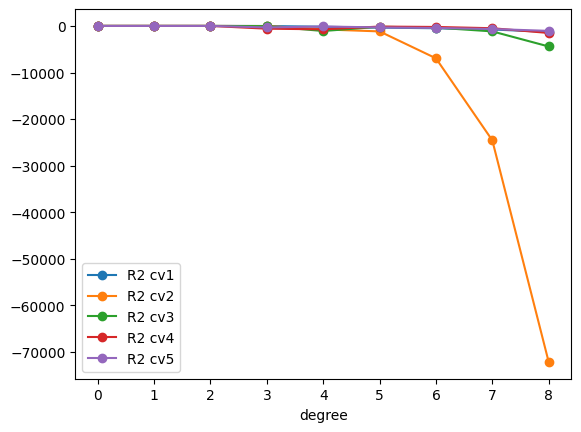

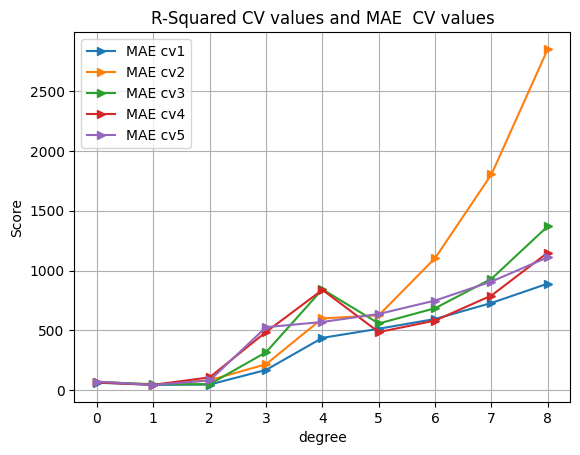

In [113]:
# Plot R2 cv values and MAE cv values metrics
df.plot(x='degree', y=['R2 cv1','R2 cv2','R2 cv3','R2 cv4','R2 cv5'], marker='o')
df.plot(x='degree', y=['MAE cv1','MAE cv2','MAE cv3','MAE cv4','MAE cv5'], marker='>')
plt.title('R-Squared CV values and MAE  CV values')
plt.xlabel('degree')
plt.ylabel('Score')
plt.grid(True)
plt.show()

The Below graph represents the R-Squared and Mean Absolute Error (MAE) scores for different degrees of polynomial regression models

- As the polynomial degree increases, R-squared decreases due to overfitting and decreased generalization ability. Striking a balance between model complexity and generalization is crucial when selecting the degree.
- As the degree of the polynomial increases, the Mean Absolute Error (MAE) also increases in the graph because higher-degree polynomials introduce more complexity, leading to a larger deviation between predicted values and actual values.

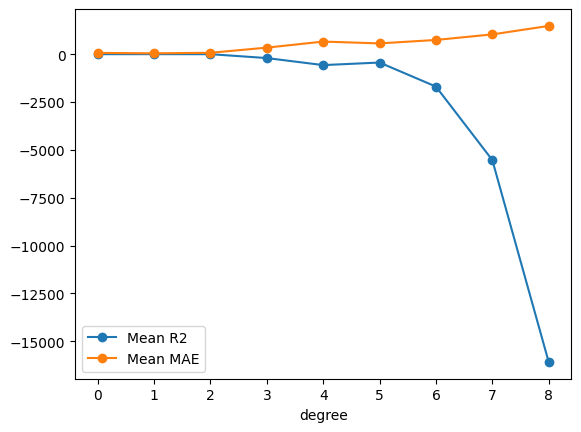

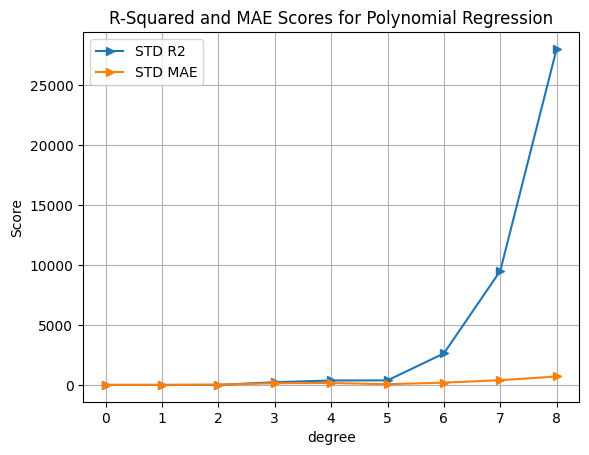

In [111]:

# Plot R-Squared and MAE metrics
df_msd.plot(x='degree', y=['Mean R2', 'Mean MAE'], marker='o')
df_msd.plot(x='degree', y=['STD R2', 'STD MAE'], marker='>')
plt.title('R-Squared and MAE Scores for Polynomial Regression')
plt.xlabel('degree')
plt.ylabel('Score')
plt.grid(True)
plt.show()
